In [14]:
# initialize tensor and lists to monitor test loss and accuracy
test_loss = torch.zeros(1)
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

# set the module to evaluation mode
net.eval()

for batch_i, data in enumerate(test_loader):
    
    # get the input images and their corresponding labels
    inputs, labels = data
    
    # wrap them in a torch Variable
    # volatile means we do not have to track how the inputs change
    #################################inputs, labels = Variable(inputs, volatile=True), Variable(labels, volatile=True)
    with torch.no_grad():            ############### replaced above line deprecated with this one
    
        # forward pass to get outputs
        outputs = net(inputs)

        # calculate the loss
        loss = criterion(outputs, labels)

        # update average test loss 
        test_loss = test_loss + ((torch.ones(1) / (batch_i + 1)) * (loss.data - test_loss))

        # get the predicted class from the maximum value in the output-list of class scores
        _, predicted = torch.max(outputs.data, 1)

        # compare predictions to true label
        correct = np.squeeze(predicted.eq(labels.data.view_as(predicted)))

        # calculate test accuracy for *each* object class
        # we get the scalar value of correct items for a class, by calling `correct[i].item()`
        for i in range(batch_size):
            label = labels.data[i]
            class_correct[label] += correct[i].item()
            class_total[label] += 1

        # calculate test accuracy for *each* object class      ########### removed whole duplicate section
       #for i in range(batch_size):
        #    label = labels.data[i]
         #   class_correct[label] += correct[i].item()         ########## added missing .item()
          #  class_total[label] += 1

print('Test Loss: {:.6f}\n'.format(test_loss.numpy()[0]))
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

        
print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.303786

Test Accuracy of T-shirt/top: 81% (811/1000)
Test Accuracy of Trouser: 96% (969/1000)
Test Accuracy of Pullover: 75% (757/1000)
Test Accuracy of Dress: 92% (927/1000)
Test Accuracy of  Coat: 86% (867/1000)
Test Accuracy of Sandal: 96% (968/1000)
Test Accuracy of Shirt: 70% (702/1000)
Test Accuracy of Sneaker: 96% (965/1000)
Test Accuracy of   Bag: 98% (980/1000)
Test Accuracy of Ankle boot: 96% (960/1000)

Test Accuracy (Overall): 89% (8906/10000)


Epoch: 1 	Training Loss: 0.760458
Epoch: 2 	Training Loss: 0.470761
Epoch: 3 	Training Loss: 0.410502
Epoch: 4 	Training Loss: 0.375903
Epoch: 5 	Training Loss: 0.353131
Epoch: 6 	Training Loss: 0.331082
Epoch: 7 	Training Loss: 0.315705
Epoch: 8 	Training Loss: 0.302857
Epoch: 9 	Training Loss: 0.291854
Epoch: 10 	Training Loss: 0.281041


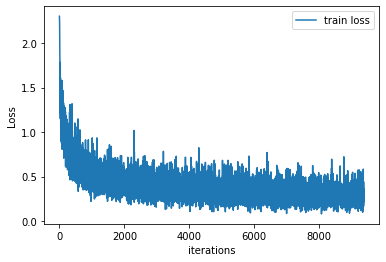

In [4]:
import torch
from torchvision import datasets
import torchvision.transforms as transforms
from torchvision.datasets import FashionMNIST
import numpy as np
import datetime
import time
from torch.utils.tensorboard import SummaryWriter
import matplotlib.pyplot as plt

val_losses = []
train_losses = []

torch.manual_seed(73)

train_data = FashionMNIST('./fmnist', train=True, download=True, transform=transforms.ToTensor())
test_data = FashionMNIST('./fmnist', train=False, download=True, transform=transforms.ToTensor())

batch_size = 64

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True)

class ConvNet(torch.nn.Module):
    def __init__(self, hidden=64, output=10):
        super(ConvNet, self).__init__()        
        self.conv1 = torch.nn.Conv2d(1, 4, kernel_size=7, padding=0, stride=3)
        self.fc1 = torch.nn.Linear(256, hidden)
        self.fc2 = torch.nn.Linear(hidden, output)

    def forward(self, x):
        x = self.conv1(x)
        # the model uses the square activation function
        x = x * x
        # flattening while keeping the batch axis
        x = x.view(-1, 256)
        x = self.fc1(x)
        x = x * x
        x = self.fc2(x)
        return x


def train(model, train_loader, criterion, optimizer, n_epochs=10):
    # model in training mode
    model.train()
    for epoch in range(1, n_epochs+1):

        train_loss = 0.0
        for data, target in train_loader:
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            train_losses.append(loss.item())
        # calculate average losses
        train_loss = train_loss / len(train_loader)

        print('Epoch: {} \tTraining Loss: {:.6f}'.format(epoch, train_loss))
    
    # model in evaluation mode
    model.eval()
    return model


model = ConvNet()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
model = train(model, train_loader, criterion, optimizer, 10)


plt.plot(train_losses,label="train loss")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

Test Loss: 0.373542

Test Accuracy of 0: 75% (752/1000)
Test Accuracy of 1: 96% (964/1000)
Test Accuracy of 2: 74% (743/1000)
Test Accuracy of 3: 88% (887/1000)
Test Accuracy of 4: 82% (822/1000)
Test Accuracy of 5: 92% (922/1000)
Test Accuracy of 6: 72% (729/1000)
Test Accuracy of 7: 95% (952/1000)
Test Accuracy of 8: 97% (970/1000)
Test Accuracy of 9: 96% (967/1000)

Test Accuracy (Overall): 87% (8708/10000)


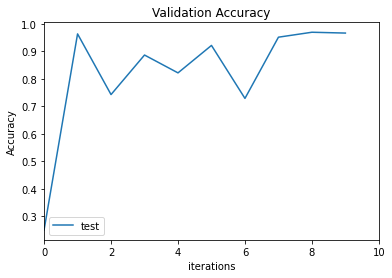

In [5]:
acc = [] 
def test(model, test_loader, criterion):
    # initialize lists to monitor test loss and accuracy
    test_loss = 0.0
    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))

    # model in evaluation mode
    model.eval()

    for data, target in test_loader:
        output = model(data)
        loss = criterion(output, target)
        test_loss += loss.item()
        # convert output probabilities to predicted class
        _, pred = torch.max(output, 1)
        # compare predictions to true label
        correct = np.squeeze(pred.eq(target.data.view_as(pred)))
        # calculate test accuracy for each object class
        for i in range(len(target)):
            label = target.data[i]
            class_correct[label] += correct[i].item()
            class_total[label] += 1

    # calculate and print avg test loss
    test_loss = test_loss/len(test_loader)
    print(f'Test Loss: {test_loss:.6f}\n')

    for label in range(10):
        print(
            f'Test Accuracy of {label}: {int(100 * class_correct[label] / class_total[label])}% '
            f'({int(np.sum(class_correct[label]))}/{int(np.sum(class_total[label]))})'
        )
        if(label == 0):
          acc.append(0.25)
        else:
          acc.append(class_correct[label] / class_total[label])

    print(
        f'\nTest Accuracy (Overall): {int(100 * np.sum(class_correct) / np.sum(class_total))}% ' 
        f'({int(np.sum(class_correct))}/{int(np.sum(class_total))})'
    )
test(model, test_loader, criterion)
plt.title("Validation Accuracy")

plt.plot(acc,label="test")
plt.xlabel("iterations")
# plt.ylim(0.5,0.99)
plt.xlim(0,10)
plt.ylabel("Accuracy")
plt.legend()
plt.show()
# print(acc)

In [6]:
part_te = torch.utils.data.random_split(test_data, [600, len(test_data)-600])[0]
test_loader_split = torch.utils.data.DataLoader(part_te, batch_size=batch_size, shuffle=True)
print(len(part_te))

600


In [7]:
!pip install tenseal

In [8]:
enc_val_loss = []
enc_acc = []

In [9]:

"""
It's a PyTorch-like model using operations implemented in TenSEAL.
    - .mm() method is doing the vector-matrix multiplication explained above.
    - you can use + operator to add a plain vector as a bias.
    - .conv2d_im2col() method is doing a single convlution operation.
    - .square_() just square the encrypted vector inplace.
"""

import tenseal as ts


class EncConvNet:
    def __init__(self, torch_nn):
        self.conv1_weight = torch_nn.conv1.weight.data.view(
            torch_nn.conv1.out_channels, torch_nn.conv1.kernel_size[0],
            torch_nn.conv1.kernel_size[1]
        ).tolist()
        self.conv1_bias = torch_nn.conv1.bias.data.tolist()
        
        self.fc1_weight = torch_nn.fc1.weight.T.data.tolist()
        self.fc1_bias = torch_nn.fc1.bias.data.tolist()
        
        self.fc2_weight = torch_nn.fc2.weight.T.data.tolist()
        self.fc2_bias = torch_nn.fc2.bias.data.tolist()
        
        
    def forward(self, enc_x, windows_nb):
        # conv layer
        enc_channels = []
        for kernel, bias in zip(self.conv1_weight, self.conv1_bias):
            y = enc_x.conv2d_im2col(kernel, windows_nb) + bias
            enc_channels.append(y)
        # pack all channels into a single flattened vector
        enc_x = ts.CKKSVector.pack_vectors(enc_channels)
        # square activation
        enc_x.square_()
        # fc1 layer
        enc_x = enc_x.mm(self.fc1_weight) + self.fc1_bias
        # square activation
        enc_x.square_()
        # fc2 layer
        enc_x = enc_x.mm(self.fc2_weight) + self.fc2_bias
        return enc_x
    
    def __call__(self, *args, **kwargs):
        return self.forward(*args, **kwargs)

    
def enc_test(context, model, test_loader, criterion, kernel_shape, stride):
    # initialize lists to monitor test loss and accuracy
    test_loss = 0.0
    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))
    i = 0
    for data, target in test_loader:
        # Encoding and encryption
        i=i+1
        if(i%10 == 0):
          
          t1 = time.time()
          st = datetime.datetime.fromtimestamp(t1).strftime('%H:%M:%S')
          print("test numbers done: ",i, "in",st)
        x_enc, windows_nb = ts.im2col_encoding(
            context, data.view(28, 28).tolist(), kernel_shape[0],
            kernel_shape[1], stride
        )
        
        # Encrypted evaluation
        enc_output = enc_model(x_enc, windows_nb)
        # Decryption of result
        output = enc_output.decrypt()
        output = torch.tensor(output).view(1, -1)
        
        # compute loss
        loss = criterion(output, target)
        test_loss += loss.item()
        enc_val_loss.append(loss.item())
        # convert output probabilities to predicted class
        _, pred = torch.max(output, 1)
        # compare predictions to true label
        correct = np.squeeze(pred.eq(target.data.view_as(pred)))
        # calculate test accuracy for each object class
        label = target.data[0]
        class_correct[label] += correct.item()
        class_total[label] += 1


    # calculate and print avg test loss
    test_loss = test_loss / sum(class_total)
    print(f'Test Loss: {test_loss:.6f}\n')

    for label in range(10):
        print(
            f'Test Accuracy of {label}: {int(100 * class_correct[label] / class_total[label])}% '
            f'({int(np.sum(class_correct[label]))}/{int(np.sum(class_total[label]))})'
        )
        if(label == 0):
          enc_acc.append(0)
        else:
          enc_acc.append(class_correct[label] / class_total[label])
        

    print(
        f'\nTest Accuracy (Overall): {int(100 * np.sum(class_correct) / np.sum(class_total))}% ' 
        f'({int(np.sum(class_correct))}/{int(np.sum(class_total))})'
    )


# Load one element at a time
test_loader = torch.utils.data.DataLoader(part_te, batch_size=1, shuffle=True)
# required for encoding
kernel_shape = model.conv1.kernel_size
stride = model.conv1.stride[0]

In [10]:
## Encryption Parameters

# controls precision of the fractional part
bits_scale = 26

# Create TenSEAL context
context = ts.context(
    ts.SCHEME_TYPE.CKKS,
    poly_modulus_degree=8192,
    coeff_mod_bit_sizes=[31, bits_scale, bits_scale, bits_scale, bits_scale, bits_scale, bits_scale, 31]
)

# set the scale
context.global_scale = pow(2, bits_scale)

# galois keys are required to do ciphertext rotations
context.generate_galois_keys()

In [11]:

enc_model = EncConvNet(model)
enc_test(context, enc_model, test_loader, criterion, kernel_shape, stride)

test numbers done:  10 in 14:06:38
test numbers done:  20 in 14:07:29
test numbers done:  30 in 14:08:20
test numbers done:  40 in 14:09:11
test numbers done:  50 in 14:10:02
test numbers done:  60 in 14:10:52
test numbers done:  70 in 14:11:43
test numbers done:  80 in 14:12:34
test numbers done:  90 in 14:13:25
test numbers done:  100 in 14:14:17
test numbers done:  110 in 14:15:08
test numbers done:  120 in 14:15:59
test numbers done:  130 in 14:16:50
test numbers done:  140 in 14:17:42
test numbers done:  150 in 14:18:33
test numbers done:  160 in 14:19:25
test numbers done:  170 in 14:20:16
test numbers done:  180 in 14:21:07
test numbers done:  190 in 14:21:58
test numbers done:  200 in 14:22:49
test numbers done:  210 in 14:23:40
test numbers done:  220 in 14:24:31
test numbers done:  230 in 14:25:22
test numbers done:  240 in 14:26:13
test numbers done:  250 in 14:27:04
test numbers done:  260 in 14:27:55
test numbers done:  270 in 14:28:46
test numbers done:  280 in 14:29:37
t

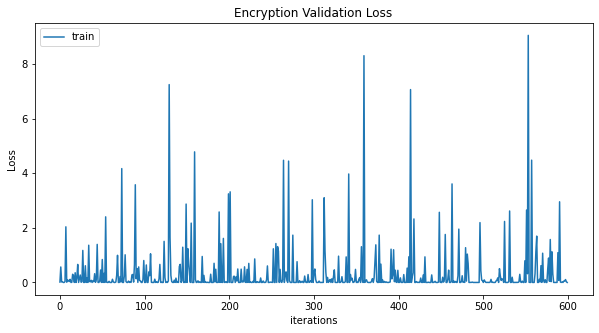

In [12]:
plt.figure(figsize=(10,5))
plt.title("Encryption Validation Loss")

plt.plot(enc_val_loss,label="train")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

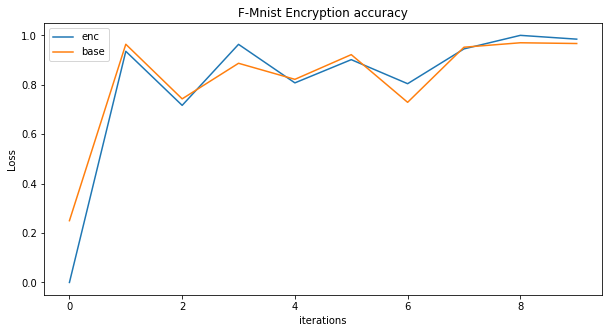

In [14]:
plt.figure(figsize=(10,5))
plt.title("F-Mnist Encryption accuracy")

plt.plot(enc_acc,label="enc")
plt.plot(acc,label = "base")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()